In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import GridSearchCV
from concurrent import futures

import logging
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").setLevel(logging.ERROR)

In [2]:
origin = pd.read_excel("./data/covid19_seoul_230531.xlsx")

In [3]:
df = origin[['서울시 기준일', '서울시 추가 확진']]
df.fillna(0, inplace = True)

In [4]:
df['서울시 기준일'] = pd.to_datetime(df['서울시 기준일'].str.strip(), format = "%Y-%m-%d")
df1_2 = df.rename(columns = {'서울시 기준일' : 'ds', '서울시 추가 확진' : 'y'})
df1_2.sort_values('ds', inplace = True)
df1_2.reset_index(drop = True, inplace = True)
df1_3 = df1_2.set_index("ds")

In [5]:
train, test = my_timeseries_split(df1_2)
train.shape, test.shape

((969, 2), (243, 2))

In [6]:
params = {
    #'growth': ['linear', 'logistic'],
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'weekly_seasonality': [True, False],
    'daily_seasonality':  [True, False],
    'yearly_seasonality': [True, False],
}

params

{'changepoint_prior_scale': [0.01, 0.1, 1.0],
 'seasonality_prior_scale': [0.01, 0.1, 1.0],
 'seasonality_mode': ['additive', 'multiplicative'],
 'weekly_seasonality': [True, False],
 'daily_seasonality': [True, False],
 'yearly_seasonality': [True, False]}

17:29:57 - cmdstanpy - INFO - Chain [1] start processing
17:29:57 - cmdstanpy - INFO - Chain [1] done processing
17:29:57 - cmdstanpy - INFO - Chain [1] start processing
17:29:57 - cmdstanpy - INFO - Chain [1] start processing
17:29:57 - cmdstanpy - INFO - Chain [1] start processing
17:29:57 - cmdstanpy - INFO - Chain [1] done processing
17:29:57 - cmdstanpy - INFO - Chain [1] start processing
17:29:57 - cmdstanpy - INFO - Chain [1] start processing
17:29:58 - cmdstanpy - INFO - Chain [1] done processing
17:29:58 - cmdstanpy - INFO - Chain [1] start processing
17:29:58 - cmdstanpy - INFO - Chain [1] start processing
17:29:58 - cmdstanpy - INFO - Chain [1] start processing
17:29:58 - cmdstanpy - INFO - Chain [1] done processing
17:29:58 - cmdstanpy - INFO - Chain [1] start processing
17:29:58 - cmdstanpy - INFO - Chain [1] start processing
17:29:58 - cmdstanpy - INFO - Chain [1] start processing
17:29:58 - cmdstanpy - INFO - Chain [1] done processing
17:29:58 - cmdstanpy - INFO - Chain 

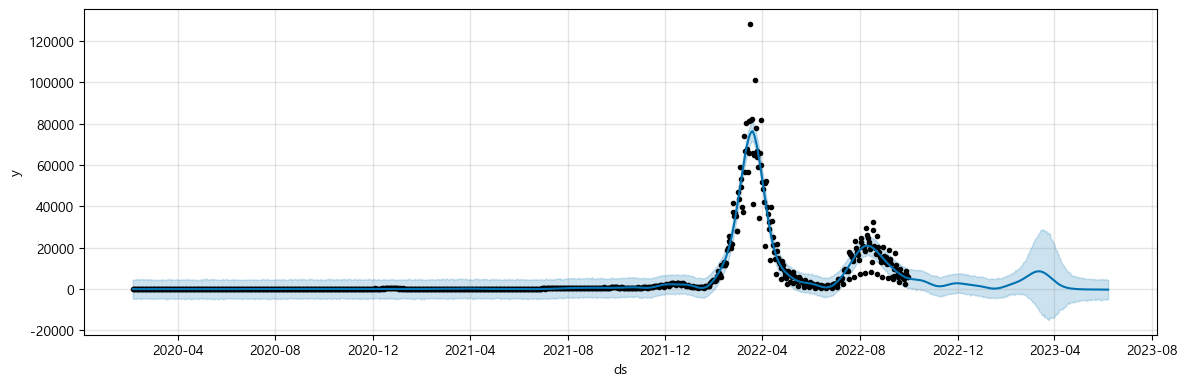

In [7]:
tmp = yjk_prophet_gridsearch(train, test, params, scoring = 'rmse', plot = True)

In [8]:
tmp

,model,params,score
0,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 1.0, 'daily_season...",6252.071978
1,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 0.1, 'daily_season...",7625.939420
2,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 0.1, 'daily_season...",11430.791239
3,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 0.1, 'daily_season...",11477.658426
4,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 0.1, 'daily_season...",11714.180107
...,...,...,...
139,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 1.0, 'daily_season...",102849.879390
140,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 1.0, 'daily_season...",107003.409521
141,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 1.0, 'daily_season...",108483.639111
142,<prophet.forecaster.Prophet object at 0x000002...,"{'changepoint_prior_scale': 1.0, 'daily_season...",109756.186936
